In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

* Load CSV file on Pandas.

In [4]:
df = pd.read_csv("D:\Progetti\Sea Level Predictor\epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


* Create a second dataset. Only measures in new millenium are mantained.

In [5]:
df_2 = df.apply(lambda x: x[df.Year >1999])
df_2.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933


* Define x and y axis.

In [6]:
X = 'Year'
Y = 'CSIRO Adjusted Sea Level'

* Define linear regression for first and second database.

In [7]:
res = linregress(x=df[X], y=df[Y])
res2 = linregress(x=df_2[X], y=df_2[Y])

* Plot lines over scatterplot where relationship between time and sea level are evaluated. 

Text(0, 0.5, 'Rise in Sea Level')

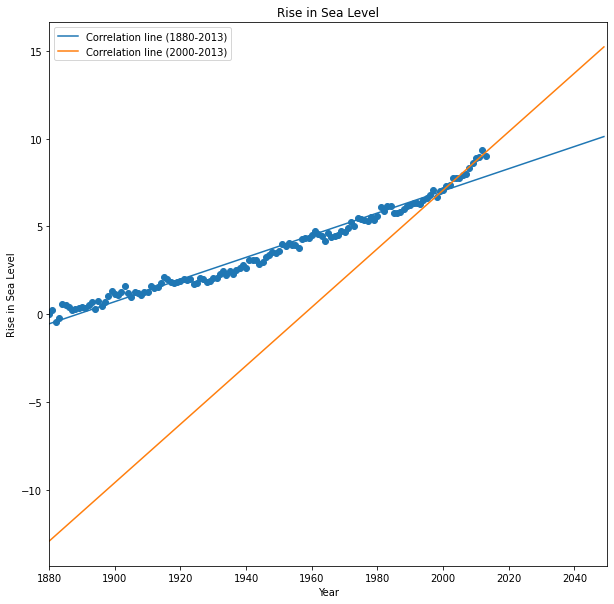

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x = X, y = Y, label= 'Rise in Sea Level', data = df)
plt.xlim(1880,2050)
dependent = np.arange(1880,2050)
line1, = ax.plot(dependent, res.intercept + res.slope * dependent, label = 'Correlation line (1880-2013)')
line2, = ax.plot(dependent, res2.intercept +res2.slope * dependent, label = 'Correlation line (2000-2013)')
ax.legend(handles = [line1, line2])
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Rise in Sea Level')